# Clasificación con Redes Neuronales (y Tensorflow)



## 1. Arquitectura típica de una red neuronal para clasificación

Las partes comunes a todas las redes neuronales profundas son las siguientes:
* Capa de entrada
* Algunas capas ocultas
* Capa de salida

Para el uso de redes neuronales para clasificación, es usual utilizar los siguientes elementos típicos.

| **Elemento** | **Clasificación binaria** | **Clasificación multiclase** |
| --- | --- | --- |
| Capa de entrada  | Igual tamaño que el número de atributos | Similar a clasificación binaria |
| Capas ocultas | Mínimo 1, máximo ilimitado | Similar a clasificación binaria |
| Neuronas por capa oculta | Generalmente de 10 a 100 | Similar a clasificación binaria |
| Capa de salida | Tamaño 1 (una clase o la otra) | 1 por clase |

Algunos otros elementos son los siguientes:

| **Elemento** | **Clasificación binaria** | **Clasificación multiclase** |
| --- | --- | --- |
| Activación oculta | Usualmente ReLU (rectified linear unit) | Similar a clasificación binaria |
| Activación de salida | Sigmoidea | Softmax |
| Función de pérdida  | Entropía cruzada binaria (Cross entropy) | Entropía cruzada categórica |
| Optimizador | SGD (stochastic gradient descent), Adamk, etc. | Similar a clasificación binaria |

In [12]:
import pandas as pd
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

import tensorflow as tf

print(tf.__version__)

2.8.0


## 2. Creación de datos 

Por facilidad se utilizará la función `make_circles()` de Scikit-Learn.



In [5]:
# Número de muestras
n_samples = 1000
# Crear círculos
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

# Atributos
print(X)

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]


In [6]:
# Mostrar las 10 primeras etiquetas
print(y[:10])

[1 1 1 1 0 1 1 1 1 0]


In [9]:
# Crear un dataframe de atributos y etiquetas
circulos = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "etiqueta":y})
circulos.head()

,X0,X1,etiqueta
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [11]:
# Verificar los valores de las etiquetas
circulos.etiqueta.value_counts()

1    500
0    500
Name: etiqueta, dtype: int64

Se tiene un problema de clasificación binaria ya que solo se tiene 2 etiquetas: 1 y 0

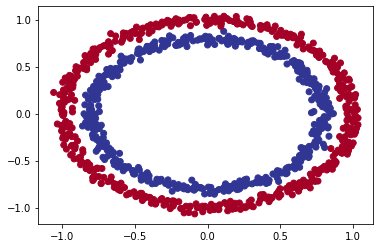

In [13]:
# Visualización de los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Sería conveniente utilizar el [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true) para ver experimentalmente el efecto de los componentes de una red neuronal. Intentar ajustar los diferentes hiperparámetros que se ve y hacer click a play para ver el entrenamiento de una red neuronal.


**Tamaños de las entradas y salidas**

In [14]:
# Verificar los tamaños de los atributos y de las etiquetas
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [15]:
# Primera instancia de atributos y de etiquetas
print(X[0])
print(y[0])

[0.75424625 0.23148074]
1


## 3. Modelamiento

1. Crear el modelo
2. Compilar el modelo
3. Ajustar (entrenar) el modelo

In [16]:
# Semilla aleatoria
tf.random.set_seed(42)

# 1. Creación del modelo
modelo_1 = tf.keras.Sequential([
                                tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
modelo_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),     # Solo 2 clases
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# 3. Entrenamiento del modelo
modelo_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4830


In [17]:
# Entrenamiento usando más épocas
modelo_1.fit(X, y, epochs=200, verbose=0) 

In [18]:
modelo_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

**Mejoras**: Se puede añadir más capas

In [19]:
tf.random.set_seed(42)

modelo_2 = tf.keras.Sequential([
                                tf.keras.layers.Dense(1), 
                                tf.keras.layers.Dense(1) 
])

modelo_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ['accuracy'])

historia = modelo_2.fit(X, y, epochs=100, verbose=0)

In [20]:
# Evaluate the model
modelo_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## 4. Mejora del modelo

Se puede realizar mejoras de manera similar a como se realiza en regresión.

In [22]:
tf.random.set_seed(42)

modelo_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # añadir 100 neuronas
                               tf.keras.layers.Dense(10),  # capa con 10 neuronas
                               tf.keras.layers.Dense(1)
])

modelo_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),  # Uso de Adam
                metrics = ['accuracy'])

modelo_3.fit(X, y, epochs=100, verbose=0)   # Usar 100 pasadas por las datas

In [23]:
# Evaluar el modelo
modelo_3.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

## 5. Visualización 

Cuando un modelo se comporta de manera extraña o hay algo que no parece correcto, lo usual es realizar una visualización para inspeccionar el modelo e inspeccionar las predicciones del modelo. 

Para visualizar, en este caso, se va a realizar una función `plot_decision_boundary()` que realizará lo siguiente:
* Tomar los atributos (X) y etiquetas como entrada (y)
* Crear una malla (meshgrid) de los valores de X
* Graficar las predicciones y la línea entre las diferentes zonas (donde se encuentra cada clase única)

In [24]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Graficar la frontera de decisión 
  """
  # Definir los ejes de las fronteras y crear la malla
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Crear los valores de X (se va a predecir para esos valores)
  x_in = np.c_[xx.ravel(), yy.ravel()]
  # Realizar las predicciones usando el modelo entrenado
  y_pred = model.predict(x_in)

  # Verificar si es multi clase
  if model.output_shape[-1] > 1: # Verificar la dimensión final de la salida: si es > 1, es multi clase
    print("Realizando clasificación multiclase ...")
    # Se tiene que modificar los tamaños de las predicciones para graficarlas
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Realizando clasificación binaria...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Graficar la frontera de decisión
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Realizando clasificación binaria...


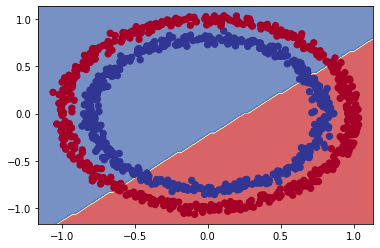

In [25]:
# Verificación sobre los datos
plot_decision_boundary(modelo_3, X, y)

El modelo intenta dibujar una línea a lo largo de los datos. Sin embargo los datos no son separables por una línea recta. En un problema de regresión, el problema puede funcionar, pero en clasificación no.

## 6. No linealidad

Se puede añadir no linealidad al sistema introduciendo funciones de activación a la salida de las capas densas. Para esto se utilizará el parámetro `activation`.

In [26]:
tf.random.set_seed(42)

modelo_4 = tf.keras.Sequential([
                                tf.keras.layers.Dense(1, 
                                                      activation = tf.keras.activations.relu), # similar a: activation='relu'
                                tf.keras.layers.Dense(1) # Capa de salida
])

modelo_4.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

history = modelo_4.fit(X, y, epochs=100, verbose=0)

In [27]:
# Evaluación del modelo
modelo_4.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931846141815186, 0.5]

Para mejorar se añadirá capas a la red

In [29]:
tf.random.set_seed(42)

modelo_5 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation = tf.keras.activations.relu), # capa oculta con 4 neuronas y ReLU
                                tf.keras.layers.Dense(4, activation = tf.keras.activations.relu), # capa oculta con 4 neuronas y ReLU
                                tf.keras.layers.Dense(1) # capa de salida
])

modelo_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=0.001), # Por defecto es 0.001
                metrics = ['accuracy'])

history = modelo_5.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [30]:
# Evaluate the model
modelo_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Aún se está en 50 % (el modelo está prácticamente adivinando). Es útil visualizar cómo se ven las predicciones

Realizando clasificación binaria...


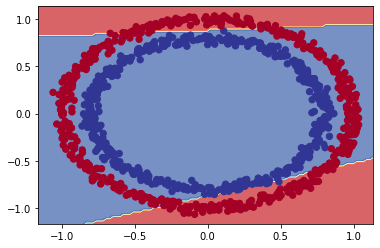

In [31]:
plot_decision_boundary(modelo_5, X, y)

Se añadirá una función de activación sigmoidea para la capa de salida. De hecho, en clasificación, una salida sigmoidea es usual.

In [32]:
tf.random.set_seed(42)

modelo_6 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
                                tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # Activación sigmoidea
])

modelo_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history = modelo_6.fit(X, y, epochs=100, verbose=0)

In [33]:
# Evaluate our model
modelo_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Realizando clasificación binaria...


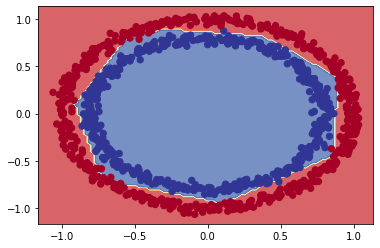

In [34]:
plot_decision_boundary(modelo_6, X, y)

## 7. Evaluación y mejora del modelo

Se debe separar los datos en un conjunto de entrenamiento y evaluación (o prueba) y evaluar en el conjunto de evaluación

In [35]:
# Elementos en el dataset
len(X)

1000

In [36]:
# Separación de datos
X_train, y_train = X[:800], y[:800] # 80% para entrenamiento
X_test, y_test = X[800:], y[800:]   # 20% para prueba

X_train.shape, X_test.shape 

((800, 2), (200, 2))

In [37]:
tf.random.set_seed(42)

modelo_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

modelo_7.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(lr=0.01), # Incremento para que sea más rápido
                 metrics = ['accuracy'])

history = modelo_7.fit(X_train, y_train, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

In [39]:
loss, accuracy = modelo_7.evaluate(X_test, y_test)

print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Exactitud en el conjunto de prueba: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000
Pérdida en el conjunto de prueba: 0.12468849867582321
Exactitud en el conjunto de prueba: 100.00%


Es conveniente una inspección visual


Realizando clasificación binaria...
Realizando clasificación binaria...


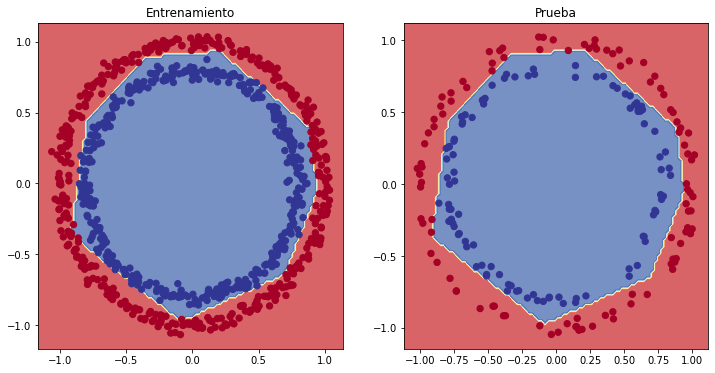

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(modelo_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Prueba")
plot_decision_boundary(modelo_7, X=X_test, y=y_test)
plt.show()

**Curvas de pérdida**

También son llamadas curvas de aprendizaje y muestran cómo se comporta el modelo durante el entrenamiento.

In [42]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


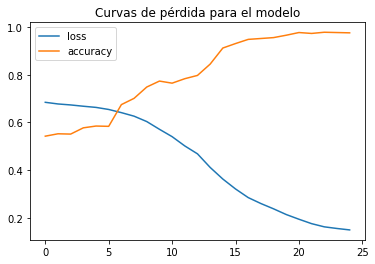

In [45]:
# Curvas
pd.DataFrame(history.history).plot();
plt.title("Curvas de pérdida para el modelo");

**Factor de aprendizaje**

In [47]:
tf.random.set_seed(42)

modelo_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

modelo_8.compile(loss = "binary_crossentropy",
                 optimizer = "Adam",
                 metrics = ["accuracy"]) 

# Callback para el factor de aprendizaje
#      Comenzar en 1e-4, e incrementar 10**(epoch/20) cada época
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 

history = modelo_8.fit(X_train, 
                      y_train, 
                      epochs = 100,
                      callbacks = [lr_scheduler], 
                      verbose = 0)

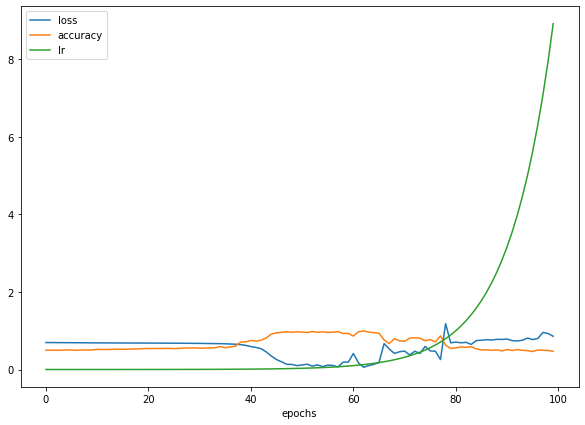

In [48]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

El factor de aprendizaje se incrementa exponencialmente con el número de épocas. La exactitud se incrementa en un punto específico cuando el factor de aprendizaje se incrementa lento. Se desea encontrar este punto. Para ello, se utilizará un gráfico en escala logarítmica.

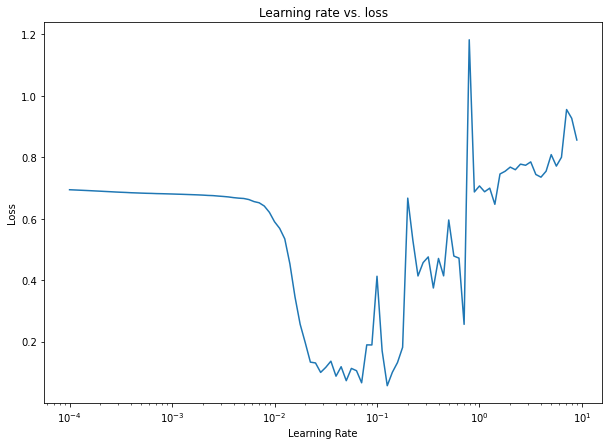

In [49]:
# Factor de aprendizaje vs Pérdida
lrs = 1e-4 * (10 ** (np.arange(100)/20))

plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # Eje x en escala logarítmica
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

Un factor de aprendizaje estimado idal es de aproximadamente 0.02. Se utilizará y se re entrenará un modelo.

In [50]:
tf.random.set_seed(42)

modelo_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

modelo_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), 
                metrics=["accuracy"])

history = modelo_9.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

Se llega a una exactitud alta con menos épocas (20 en lugar de 25)

In [51]:
# Evaluar el modelo en el conjunto de prueba
modelo_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

Realizando clasificación binaria...
Realizando clasificación binaria...


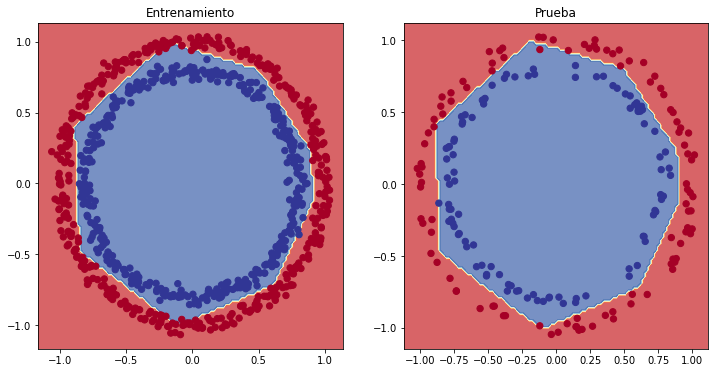

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Entrenamiento")
plot_decision_boundary(modelo_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Prueba")
plot_decision_boundary(modelo_9, X=X_test, y=y_test)
plt.show()

### 8. Otras formas de evaluación

La siguiente tabla muestra algunas de las métricas más usuales

| **Métrica/método** | **Definición** | **Código** |
| --- | --- | --- |
| Exactitud | De cada 100 predicciones, cuántas son correctas | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) o [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precisión | Proporción de verdaderos positivos entre el total de muestras. | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) o [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proporción de verdaderos positivos entre el total de verdaderos positivos y falsos negativos (predice 0 cuando es 1). | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) o [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combina precisión y recall. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Matriz de confusión | Compara los valores predichos con los reales en formato tabular | [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |


In [54]:
# Exactitud del modelo
loss, accuracy = modelo_9.evaluate(X_test, y_test)

print(f"Pérdida: {loss}")
print(f"Exactitud: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
Pérdida: 0.05740184709429741
Exactitud: 99.00%


In [59]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = modelo_9.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

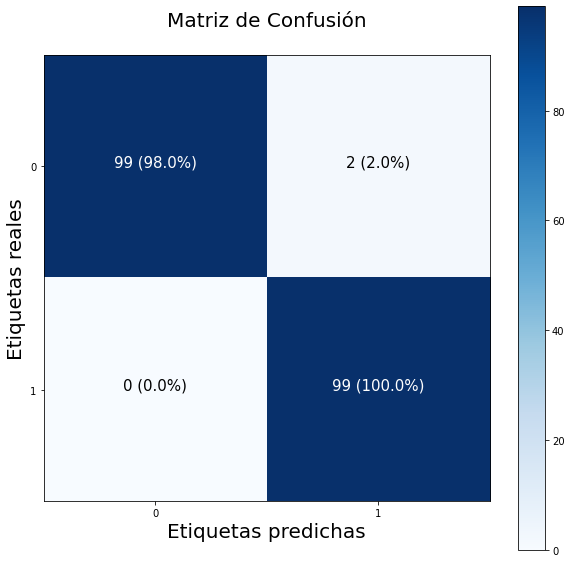

In [61]:
import itertools

figsize = (10, 10)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Matriz de Confusión",
       xlabel="Etiquetas predichas",
       ylabel="Etiquetas reales",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)